In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
from scipy.misc import imread

In [7]:
# ------------------------------------ Cleanup CSV files --------------------------------------------------------

# Get sources of raw data for cleanup
species_filename1 = "../Data/Clean/Monarch/Monarch_clean.csv"
species_filename2 = "../Data/Clean/Whale/Blue_Whale.csv"
species_filename3 = "../Data/Clean/Whale/Humpback_whale.csv"
species_filename4 = "../Data/Clean/Tern/Arctic Tern.csv"

# Reading csv files
df_monarch = pd.read_csv(species_filename1)
#df_blue_whale = pd.read_csv(species_filename2)
#df_humpback_whale = pd.read_csv(species_filename3)
df_arctic_tern = pd.read_csv(species_filename4)

In [ ]:
#df_blue_whale.head()

In [ ]:
#df_humpback_whale.head()

In [9]:
df_arctic_tern.head()

,geom,oid,longitude,latitude,providers,species,datasets,date_min,date_max,num_records,num_animals,num_species,csquare,geom_wkt
0,0103000020E61000000100000005000000000000000040...,6785394,-179,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,2,200.0,1,7517:218,"POLYGON((-178 51,-179 51,-179 52,-178 52,-178 ..."
1,0103000020E61000000100000005000000000000000020...,6785377,-178,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,13.0,1,7517:217,"POLYGON((-177 51,-178 51,-178 52,-177 52,-177 ..."
2,0103000020E61000000100000005000000000000000000...,6785361,-177,52,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,6.0,1,7517:216,"POLYGON((-176 51,-177 51,-177 52,-176 52,-176 ..."
3,0103000020E61000000100000005000000000000000040...,6785762,-170,63,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,194.0,1,7617:130,"POLYGON((-170 63,-171 63,-171 64,-170 64,-170 ..."
4,0103000020E610000001000000050000000000000000C0...,6785281,-166,60,"U.S. Fish and Wildlife Service, Division of Mi...",Sterna paradisaea,270,2004-07-01,2004-07-01,1,152.0,1,7516:496,"POLYGON((-166 59,-167 59,-167 60,-166 60,-166 ..."


In [20]:
arctic_adj = df_arctic_tern.dropna(subset = ['latitude','longitude','date_min'])
arctic_adj['year'] = pd.DatetimeIndex(arctic_adj['date_min']).year
arctic_adj['month']= pd.DatetimeIndex(arctic_adj['date_min']).month
arctic_1969 = arctic_adj.loc[arctic_adj['year'] == 1969]
arctic_1970 = arctic_adj.loc[arctic_adj['year'] == 1970]
arctic_1971 = arctic_adj.loc[arctic_adj['year'] == 1971]
arctic_1972 = arctic_adj.loc[arctic_adj['year'] == 1972]
arctic_1973 = arctic_adj.loc[arctic_adj['year'] == 1973]

arctic_1969.count()
# Convert String column into Date/Time column in DF
# df_arctic_tern['date_time'] = pd.to_datetime(df_arctic_tern['date_time'])
# df_arctic_tern["date"] = df_arctic_tern["date_time"].dt.strftime("%d/%m/%Y")
# time_series = pd.DataFrame(df_arctic_tern['date_time'].value_counts().reset_index())
# time_series.columns = ['date', 'count']
# time_series.head()

geom           20
oid            20
longitude      20
latitude       20
providers      20
species        20
datasets       20
date_min       20
date_max       20
num_records    20
num_animals    20
num_species    20
csquare        20
geom_wkt       20
year           20
month          20
dtype: int64

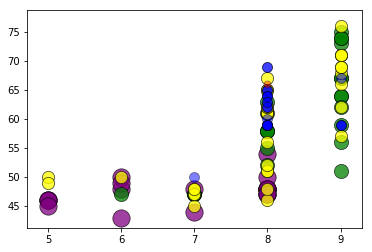

In [22]:
plt.scatter(arctic_1969.month,arctic_1969.latitude,s=300,alpha = 0.75,color = 'purple',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1970.month,arctic_1970.latitude,s=200,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1971.month,arctic_1971.latitude,s=150,alpha = 0.75,color = 'yellow',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1972.month,arctic_1972.latitude,s=100, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1973.month,arctic_1973.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)

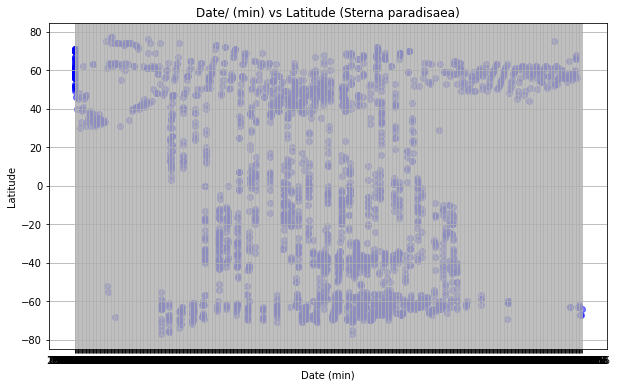

In [18]:
# Plotting the Data - Date/Time vs. Latitude
plt.figure(figsize=(10,6))
plt.scatter(df_arctic_tern["date_min"], df_arctic_tern["latitude"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Date (min)')
plt.ylabel('Latitude')
plt.title(f'Date/ (min) vs Latitude ({df_arctic_tern["species"][1]})')
# plt.savefig("./output_data/LatVsMaxTemp.png")
plt.show()

In [19]:
df_monarch.head()

,id,observed_on_string,observed_on,quality_grade,license,latitude,longitude,positional_accuracy,scientific_name,common_name
0,621484,4/12/2014 16:09,4/12/2014,research,CC-BY-NC,35.511898,-93.323380,27.0,Danaus plexippus,Monarch
1,768989,6/29/2014,6/29/2014,research,CC-BY-NC,35.513389,-93.326598,3.0,Danaus plexippus,Monarch
2,837014,8/17/2014,8/17/2014,research,CC-BY-NC,35.507590,-93.315497,13.0,Danaus plexippus,Monarch
3,866569,9/7/2014,9/7/2014,research,CC-BY-NC,35.512094,-93.326470,27.0,Danaus plexippus,Monarch
4,875141,9/13/2014,9/13/2014,research,CC-BY-NC,35.513659,-93.318597,3.0,Danaus plexippus,Monarch


In [10]:
monarch_adj = df_monarch.dropna(subset = ['latitude','longitude','observed_on'])
monarch_adj['year'] = pd.DatetimeIndex(monarch_adj['observed_on']).year
monarch_adj['month']= pd.DatetimeIndex(monarch_adj['observed_on']).month
monarch_2014 = monarch_adj.loc[monarch_adj['year'] == 2014]
monarch_2015 = monarch_adj.loc[monarch_adj['year'] == 2015]
monarch_2016 = monarch_adj.loc[monarch_adj['year'] == 2016]
monarch_2017 = monarch_adj.loc[monarch_adj['year'] == 2017]
monarch_2018 = monarch_adj.loc[monarch_adj['year'] == 2018]

monarch_2014.count()


C:\Users\kshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kshah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id                     6
observed_on_string     6
observed_on            6
quality_grade          6
license                6
latitude               6
longitude              6
positional_accuracy    6
scientific_name        6
common_name            6
year                   6
month                  6
dtype: int64

In [11]:
stderr_lon_2017=monarch_2017.longitude.sem(axis=0)
stderr_lat_2017=monarch_2017.latitude.sem(axis=0)
stderr_lon_2018=monarch_2017.longitude.sem(axis=0)
stderr_lon_2018=monarch_2017.latitude.sem(axis=0)

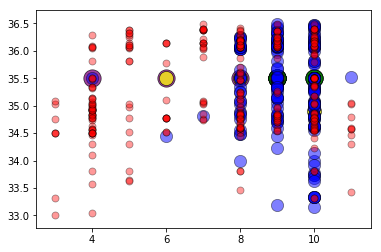

In [12]:
plt.scatter(monarch_2014.month,monarch_2014.latitude,s=300,alpha = 0.75,color = 'purple',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2015.month,monarch_2015.latitude,s=300,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2016.month,monarch_2016.latitude,s=200,alpha = 0.75,color = 'yellow',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2017.month,monarch_2017.latitude,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.month,monarch_2018.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)

plt.show()

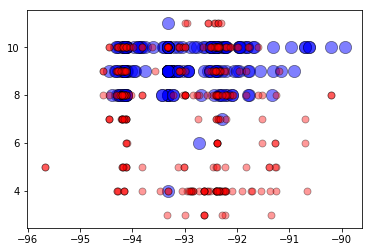

In [13]:
plt.scatter(monarch_2017.longitude,monarch_2017.month,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.longitude,monarch_2018.month,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


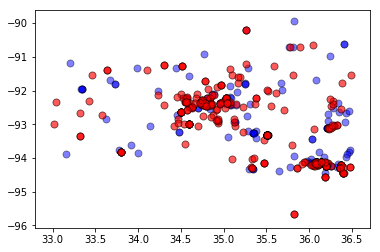

In [14]:
plt.scatter(monarch_2017.latitude,monarch_2017.longitude,s=50, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


In [15]:
ind = np.arange(monarch_adj.month)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
lon1 = plt.bar(ind, monarch_2017.longitude, width, yerr=stderr_lon_2017)
lon2 = plt.bar(ind, monarch_2018.longitude, width,
             bottom=monarch_2018.longitude, yerr=stderr_lon_2018)

plt.ylabel('Count')
plt.xticks(ind, ('4', '5', '6', '7', '8', '9', '10', '11', '12'))
plt.yticks(np.arange(0, 200, 10))

plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().